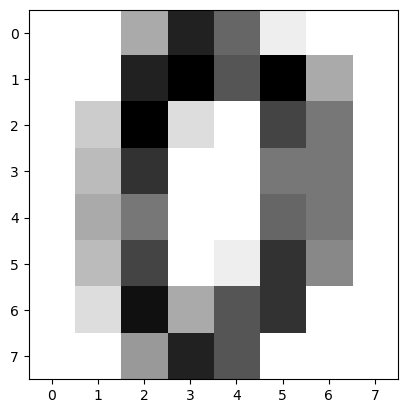

In [42]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [43]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [44]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

In [52]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [57]:
y_pred = knn.predict(X_test)

scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.9805555555555555


[9]


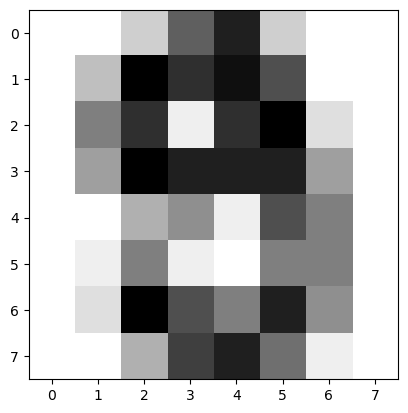

In [63]:
plt.imshow(X_test[10].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
y_pred = knn.predict([X_test[10]])
print(y_pred)

In [71]:
print(y_pred.shape)

(1,)


In [77]:
y_pred = knn.predict(X_test)

print(y_pred.shape)  # 확인용

# 필요하면 1차원으로 변경
if len(y_pred.shape) > 1:
    y_pred = y_pred.reshape(-1)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

(360,)
[[48  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  1  0  0]
 [ 0  0  0  0  0 28  1  0  0  0]
 [ 0  0  0  0  0  0 33  0  1  0]
 [ 0  0  0  0  0  0  0 31  0  0]
 [ 0  3  0  0  0  0  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  0 34]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.92      1.00      0.96        34
           2       1.00      1.00      1.00        41
           3       0.98      1.00      0.99        40
           4       1.00      0.97      0.99        36
           5       1.00      0.97      0.98        29
           6       0.97      0.97      0.97        34
           7       0.97      1.00      0.98        31
           8       0.97      0.91      0.94        32
           9       1.00      0.97      0.99        35

    accuracy                           0.98       360
   macro avg

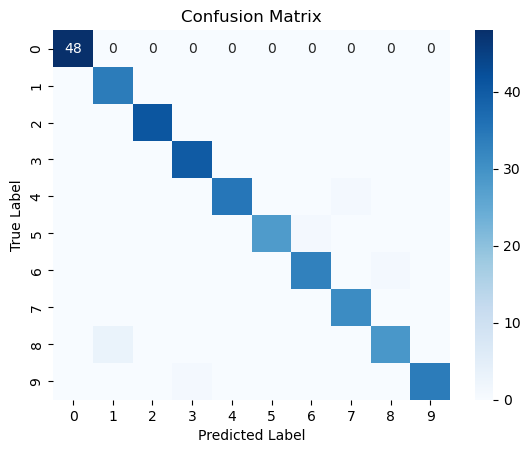

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [85]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, pred)
    print(f"{name} 정확도: {acc:.4f}")

KNN 정확도: 0.9833
SVM 정확도: 0.9917
Decision Tree 정확도: 0.8389


In [87]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, data, digits.target, cv=5)
print("각 fold 정확도:", scores)
print("평균 정확도:", scores.mean())

각 fold 정확도: [0.94444444 0.95833333 0.96657382 0.97493036 0.95264624]
평균 정확도: 0.9593856391210152
